<a href="https://colab.research.google.com/github/jaxon-z/AI-Lab/blob/main/AI_project_%5BStudent_Performance_Prediction%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### **Importing libraries**

In [ ]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [ ]:
sp = pd.read_csv('/content/gdrive/MyDrive/DIU/LEVEL 3/Level 3 Term 1/CSE 316 [Artificial Intelligence Lab]/Project/AI project/StudentsPerformance.csv')

In [ ]:
sp.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
sp.shape

(1000, 8)

In [ ]:
sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
sp.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [ ]:
'''
def bar_chart(feature):
  gA = sp[sp['race/ethnicity']=='group A'][feature].value_counts()
  gB = sp[sp['race/ethnicity']=='group B'][feature].value_counts()
  gC = sp[sp['race/ethnicity']=='group C'][feature].value_counts()
  gD = sp[sp['race/ethnicity']=='group D'][feature].value_counts()
  gE = sp[sp['race/ethnicity']=='group E'][feature].value_counts()
  df = pd.DataFrame([gA, gB, gC, gD, gE])
  df.index = ['Group A','Group B','Group C','Group D','Group E']
  df.plot(kind = 'bar', stacked = True, figsize=(10,5))
  '''

"\ndef bar_chart(feature):\n  gA = sp[sp['race/ethnicity']=='group A'][feature].value_counts()\n  gB = sp[sp['race/ethnicity']=='group B'][feature].value_counts()\n  gC = sp[sp['race/ethnicity']=='group C'][feature].value_counts()\n  gD = sp[sp['race/ethnicity']=='group D'][feature].value_counts()\n  gE = sp[sp['race/ethnicity']=='group E'][feature].value_counts()\n  df = pd.DataFrame([gA, gB, gC, gD, gE])\n  df.index = ['Group A','Group B','Group C','Group D','Group E']\n  df.plot(kind = 'bar', stacked = True, figsize=(10,5))\n  "

In [ ]:
#bar_chart('gender')

In [ ]:
def grade(math_score):
  if math_score >= 80:
    return 'A+'
  if math_score >= 75:
    return 'A'
  if math_score >= 70:
    return 'A-'
  if math_score >= 60:
    return 'A'
  if math_score >= 50:
    return 'B'
  if math_score >= 40:
    return 'C'
  if math_score >= 33:
    return 'D'
  else:
    return 'F'
  
sp['Grade']=sp['math score'].apply(grade)
sp.Grade.value_counts()

A     370
A+    193
B     188
A-    114
C      95
D      21
F      19
Name: Grade, dtype: int64

In [ ]:
def Status(math_score):
  if math_score >= 33:
    return 'Pass'
  else:
    return 'Fail'
sp['Status']=sp['math score'].apply(Status)
sp.Status.value_counts()

Pass    981
Fail     19
Name: Status, dtype: int64

In [ ]:
sp.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Grade,Status
0,female,group B,bachelor's degree,standard,none,72,72,74,A-,Pass
1,female,group C,some college,standard,completed,69,90,88,A,Pass
2,female,group B,master's degree,standard,none,90,95,93,A+,Pass
3,male,group A,associate's degree,free/reduced,none,47,57,44,C,Pass
4,male,group C,some college,standard,none,76,78,75,A,Pass


In [ ]:
def bar_chart(feature):
  ap = sp[sp['Grade']=='A+'][feature].value_counts()
  a = sp[sp['Grade']=='A'][feature].value_counts()
  am = sp[sp['Grade']=='A-'][feature].value_counts()
  b = sp[sp['Grade']=='B'][feature].value_counts()
  c = sp[sp['Grade']=='C'][feature].value_counts()
  d = sp[sp['Grade']=='D'][feature].value_counts()
  f = sp[sp['Grade']=='F'][feature].value_counts()
  df = pd.DataFrame([ap, a, am, b, c, d, f])
  df.index = ['A+', 'A', 'A-', 'B', 'C', 'D', 'F']
  df.plot(kind = 'bar', stacked = True, figsize=(10,5))

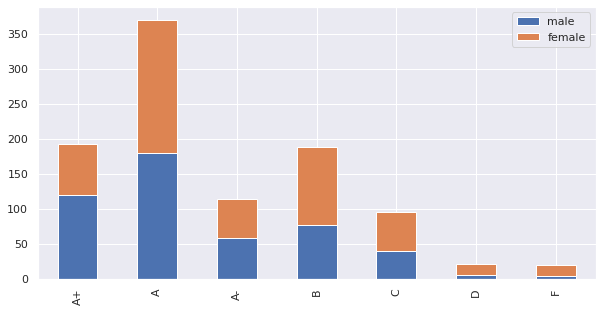

In [ ]:
bar_chart('gender')

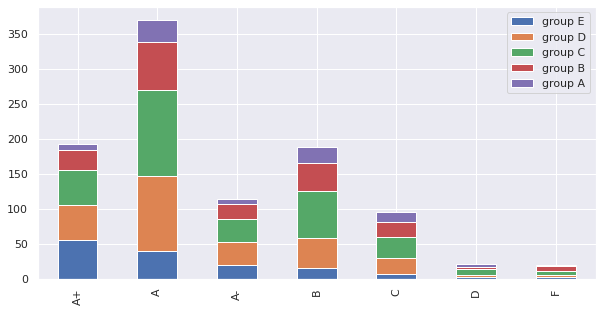

In [ ]:
bar_chart('race/ethnicity')

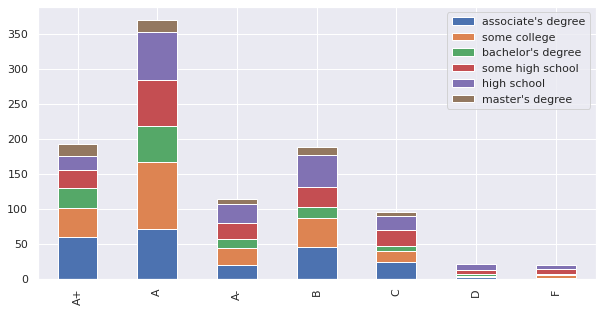

In [ ]:
bar_chart('parental level of education')

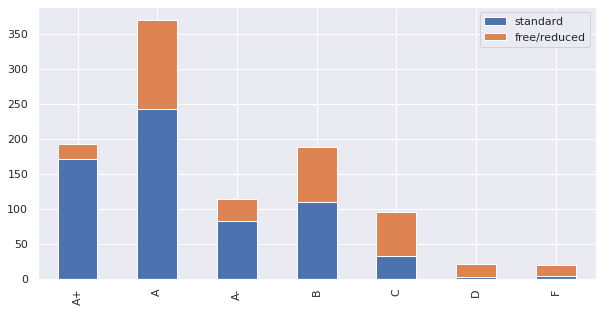

In [ ]:
bar_chart('lunch')

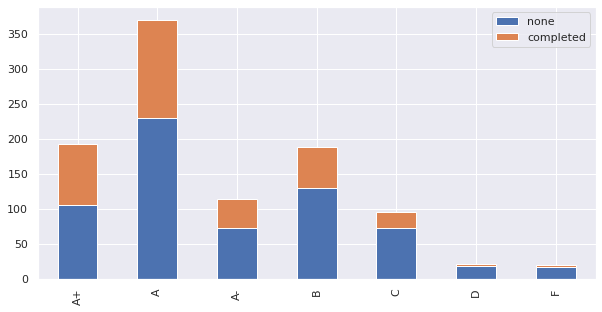

In [ ]:
bar_chart('test preparation course')

In [ ]:
sp['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

In [ ]:
parents_mapping = {"high school": 1,
                   "some high school": 2,
                   "some college": 3,
                   "associate's degree": 4,
                   "bachelor's degree": 5,
                   "master's degree": 6,}

sp_test_data = [sp]
for dataset in sp_test_data:
  dataset['parental level of education'] = dataset['parental level of education'].map(parents_mapping)

In [ ]:
sp.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Grade,Status
0,female,group B,5,standard,none,72,72,74,A-,Pass
1,female,group C,3,standard,completed,69,90,88,A,Pass
2,female,group B,6,standard,none,90,95,93,A+,Pass
3,male,group A,4,free/reduced,none,47,57,44,C,Pass
4,male,group C,3,standard,none,76,78,75,A,Pass


In [ ]:
gender_mapping = {"female": 0, "male": 1}

for dataset in sp_test_data:
  dataset['gender'] = dataset['gender'].map(gender_mapping)

In [ ]:
sp.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Grade,Status
0,0,group B,5,standard,none,72,72,74,A-,Pass
1,0,group C,3,standard,completed,69,90,88,A,Pass
2,0,group B,6,standard,none,90,95,93,A+,Pass
3,1,group A,4,free/reduced,none,47,57,44,C,Pass
4,1,group C,3,standard,none,76,78,75,A,Pass


In [ ]:
sp['race/ethnicity'].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

In [ ]:
group_mapping = {"group A": 1,
                 "group B": 2,
                 "group C": 3,
                 "group D": 4,
                 "group E": 5,}

for dataset in sp_test_data:
  dataset['race/ethnicity'] = dataset['race/ethnicity'].map(group_mapping)

In [ ]:
sp.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Grade,Status
0,0,2,5,standard,none,72,72,74,A-,Pass
1,0,3,3,standard,completed,69,90,88,A,Pass
2,0,2,6,standard,none,90,95,93,A+,Pass
3,1,1,4,free/reduced,none,47,57,44,C,Pass
4,1,3,3,standard,none,76,78,75,A,Pass


In [ ]:
lunch_mapping = {"standard": 1, "free/reduced": 0}

for dataset in sp_test_data:
  dataset['lunch'] = dataset['lunch'].map(lunch_mapping)

In [ ]:
sp.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Grade,Status
0,0,2,5,1,none,72,72,74,A-,Pass
1,0,3,3,1,completed,69,90,88,A,Pass
2,0,2,6,1,none,90,95,93,A+,Pass
3,1,1,4,0,none,47,57,44,C,Pass
4,1,3,3,1,none,76,78,75,A,Pass


In [ ]:
preparation_mapping = {"none": 0, "completed": 1}

for dataset in sp_test_data:
  dataset['test preparation course'] = dataset['test preparation course'].map(preparation_mapping)

In [ ]:
sp.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Grade,Status
0,0,2,5,1,0,72,72,74,A-,Pass
1,0,3,3,1,1,69,90,88,A,Pass
2,0,2,6,1,0,90,95,93,A+,Pass
3,1,1,4,0,0,47,57,44,C,Pass
4,1,3,3,1,0,76,78,75,A,Pass


In [ ]:
grade_mapping = {"A+": 6,
                 "A": 5,
                 "A-": 4,
                 "B": 3,
                 "C": 2,
                 "D": 1,
                 "F": 0}

for dataset in sp_test_data:
 dataset['Grade'] = dataset['Grade'].map(grade_mapping)

In [ ]:
sp.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Grade,Status
0,0,2,5,1,0,72,72,74,4,Pass
1,0,3,3,1,1,69,90,88,5,Pass
2,0,2,6,1,0,90,95,93,6,Pass
3,1,1,4,0,0,47,57,44,2,Pass
4,1,3,3,1,0,76,78,75,5,Pass


In [ ]:
status_mapping = {"Pass": 1, "Fail": 0}

for dataset in sp_test_data:
  dataset['Status'] = dataset['Status'].map(status_mapping)

In [ ]:
sp.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Grade,Status
0,0,2,5,1,0,72,72,74,4,1
1,0,3,3,1,1,69,90,88,5,1
2,0,2,6,1,0,90,95,93,6,1
3,1,1,4,0,0,47,57,44,2,1
4,1,3,3,1,0,76,78,75,5,1


In [ ]:
def bar_chart2(feature):
  ap = sp[sp['Grade']==6][feature].value_counts()
  a = sp[sp['Grade']==5][feature].value_counts()
  am = sp[sp['Grade']==4][feature].value_counts()
  b = sp[sp['Grade']==3][feature].value_counts()
  c = sp[sp['Grade']==2][feature].value_counts()
  d = sp[sp['Grade']==1][feature].value_counts()
  f = sp[sp['Grade']==0][feature].value_counts()
  df = pd.DataFrame([ap, a, am, b, c, d, f])
  df.index = ['A+', 'A', 'A-', 'B', 'C', 'D', 'F']
  df.plot(kind = 'bar', stacked = True, figsize=(10,5))

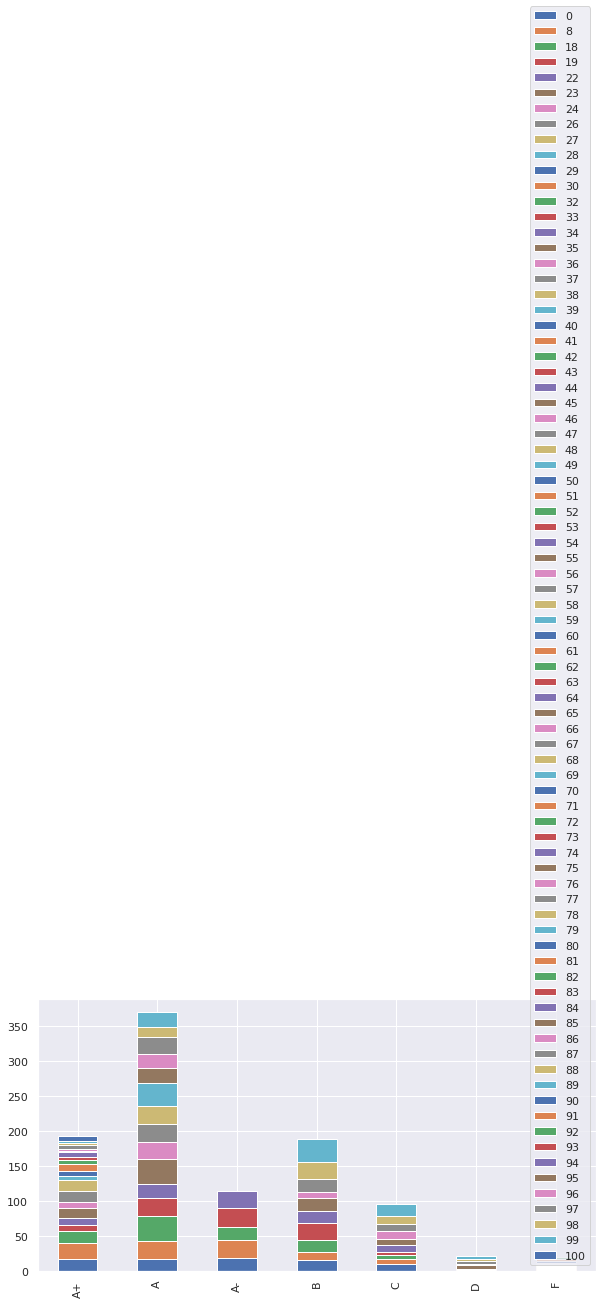

In [ ]:
bar_chart2('math score')

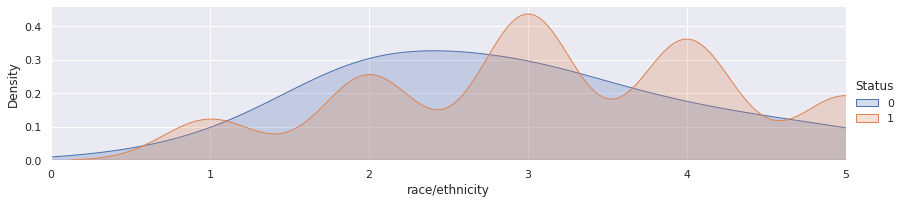

In [ ]:
facet = sns.FacetGrid(sp, hue='Status', aspect=4)
facet.map(sns.kdeplot,'race/ethnicity',shade=True)
facet.set(xlim=(0, sp['race/ethnicity'].max()))
facet.add_legend()
plt.show()

(0.0, 1.0)

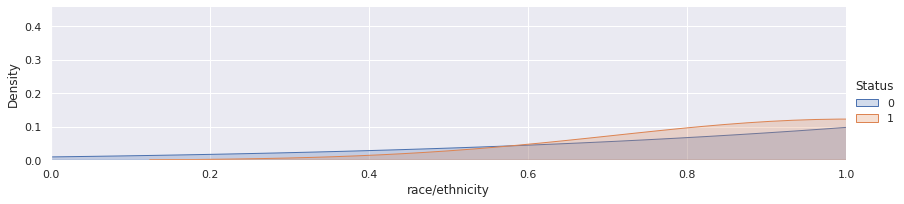

In [ ]:
facet = sns.FacetGrid(sp, hue='Status', aspect=4)
facet.map(sns.kdeplot,'race/ethnicity',shade=True)
facet.set(xlim=(0, sp['race/ethnicity'].max()))
facet.add_legend()
plt.xlim(0, 1)

(1.0, 2.0)

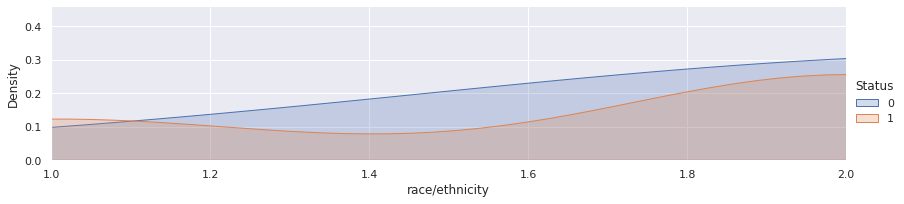

In [ ]:
facet = sns.FacetGrid(sp, hue='Status', aspect=4)
facet.map(sns.kdeplot,'race/ethnicity',shade=True)
facet.set(xlim=(0, sp['race/ethnicity'].max()))
facet.add_legend()
plt.xlim(1, 2)

(2.0, 3.0)

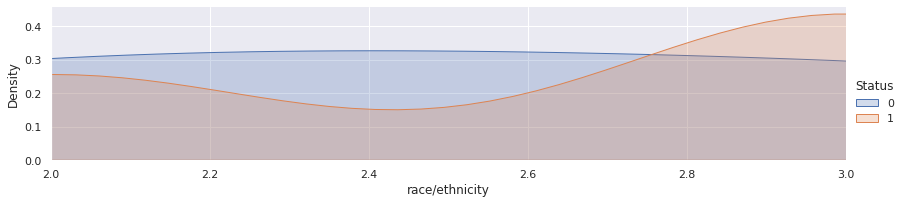

In [ ]:
facet = sns.FacetGrid(sp, hue='Status', aspect=4)
facet.map(sns.kdeplot,'race/ethnicity',shade=True)
facet.set(xlim=(0, sp['race/ethnicity'].max()))
facet.add_legend()
plt.xlim(2, 3)

(3.0, 4.0)

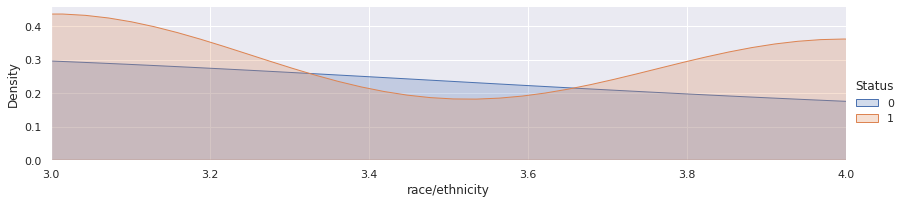

In [ ]:
facet = sns.FacetGrid(sp, hue='Status', aspect=4)
facet.map(sns.kdeplot,'race/ethnicity',shade=True)
facet.set(xlim=(0, sp['race/ethnicity'].max()))
facet.add_legend()
plt.xlim(3, 4)

(4.0, 5.0)

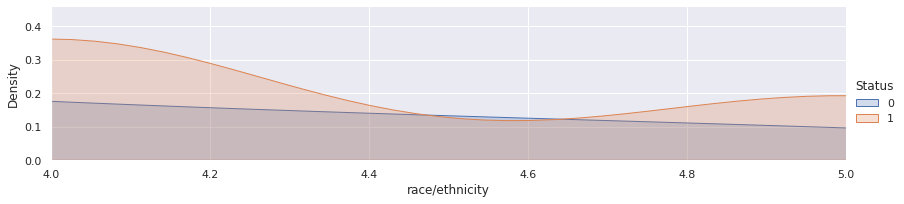

In [ ]:
facet = sns.FacetGrid(sp, hue='Status', aspect=4)
facet.map(sns.kdeplot,'race/ethnicity',shade=True)
facet.set(xlim=(0, sp['race/ethnicity'].max()))
facet.add_legend()
plt.xlim(4, 5)

(5.0, 6.0)

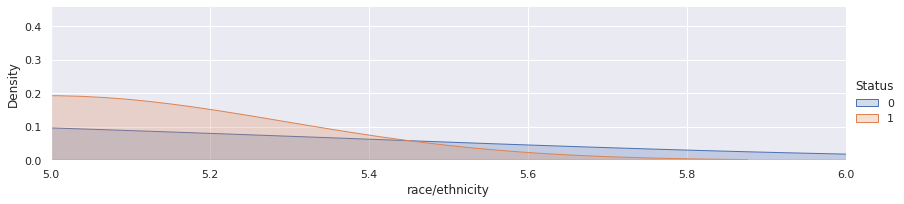

In [ ]:
facet = sns.FacetGrid(sp, hue='Status', aspect=4)
facet.map(sns.kdeplot,'race/ethnicity',shade=True)
facet.set(xlim=(0, sp['race/ethnicity'].max()))
facet.add_legend()
plt.xlim(5, 6)

(6.0, 7.0)

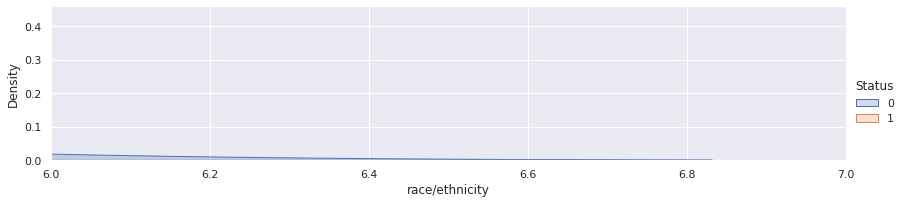

In [ ]:
facet = sns.FacetGrid(sp, hue='Status', aspect=4)
facet.map(sns.kdeplot,'race/ethnicity',shade=True)
facet.set(xlim=(0, sp['race/ethnicity'].max()))
facet.add_legend()
plt.xlim(6, 7)

In [ ]:
sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   gender                       1000 non-null   int64
 1   race/ethnicity               1000 non-null   int64
 2   parental level of education  1000 non-null   int64
 3   lunch                        1000 non-null   int64
 4   test preparation course      1000 non-null   int64
 5   math score                   1000 non-null   int64
 6   reading score                1000 non-null   int64
 7   writing score                1000 non-null   int64
 8   Grade                        1000 non-null   int64
 9   Status                       1000 non-null   int64
dtypes: int64(10)
memory usage: 78.2 KB


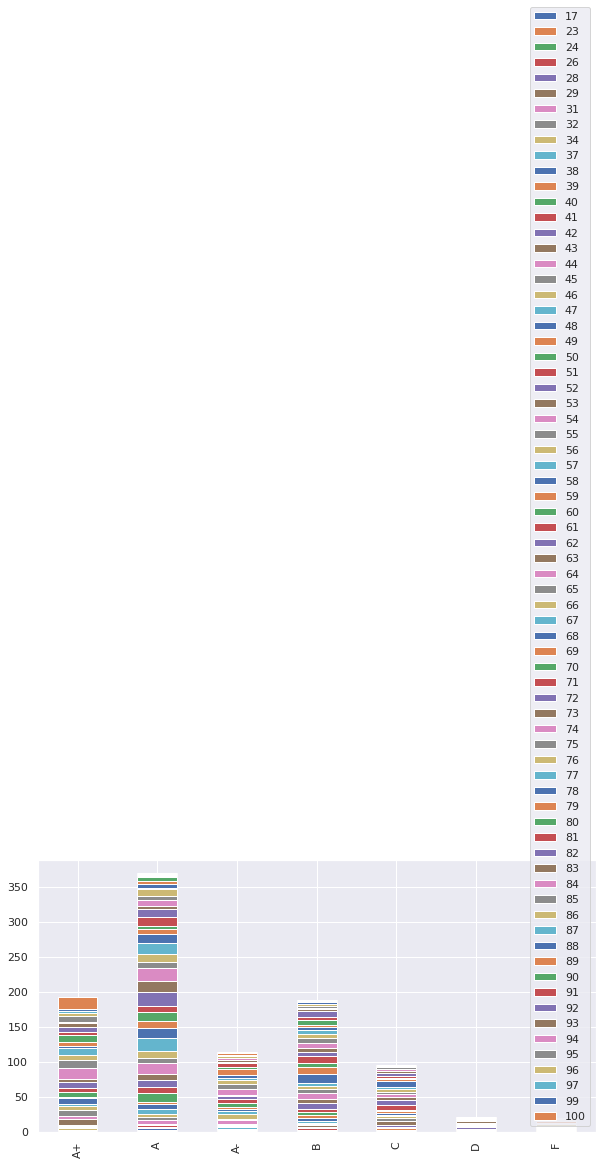

In [ ]:
bar_chart2('reading score')

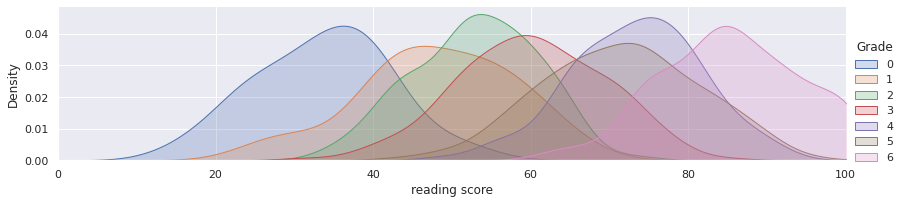

In [ ]:
facet = sns.FacetGrid(sp, hue = "Grade", aspect=4)
facet.map(sns.kdeplot, 'reading score', shade=True)
facet.set(xlim=(0, sp['reading score'].max()))
facet.add_legend()
plt.show()

In [ ]:
for dataset in sp_test_data:
  dataset.loc[ dataset['reading score'] <= 33, 'reading score'] = 0
  dataset.loc[(dataset['reading score'] > 33) & (dataset['reading score'] <= 40), 'reading score'] = 1
  dataset.loc[(dataset['reading score'] > 40) & (dataset['reading score'] <= 50), 'reading score'] = 2
  dataset.loc[(dataset['reading score'] > 50) & (dataset['reading score'] <= 60), 'reading score'] = 3
  dataset.loc[(dataset['reading score'] > 60) & (dataset['reading score'] <= 70), 'reading score'] = 4
  dataset.loc[(dataset['reading score'] > 70) & (dataset['reading score'] <= 75), 'reading score'] = 5
  dataset.loc[(dataset['reading score'] > 75) & (dataset['reading score'] <= 80), 'reading score'] = 6
  dataset.loc[ dataset['reading score'] > 80, 'reading score'] = 7

In [ ]:
sp.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Grade,Status
0,0,2,5,1,0,72,5,74,4,1
1,0,3,3,1,1,69,7,88,5,1
2,0,2,6,1,0,90,7,93,6,1
3,1,1,4,0,0,47,3,44,2,1
4,1,3,3,1,0,76,6,75,5,1


In [ ]:
for dataset in sp_test_data:
  dataset.loc[ dataset['writing score'] <= 33, 'writing score'] = 0
  dataset.loc[(dataset['writing score'] > 33) & (dataset['writing score'] <= 40), 'writing score'] = 1
  dataset.loc[(dataset['writing score'] > 40) & (dataset['writing score'] <= 50), 'writing score'] = 2
  dataset.loc[(dataset['writing score'] > 50) & (dataset['writing score'] <= 60), 'writing score'] = 3
  dataset.loc[(dataset['writing score'] > 60) & (dataset['writing score'] <= 70), 'writing score'] = 4
  dataset.loc[(dataset['writing score'] > 70) & (dataset['writing score'] <= 75), 'writing score'] = 5
  dataset.loc[(dataset['writing score'] > 75) & (dataset['writing score'] <= 80), 'writing score'] = 6
  dataset.loc[ dataset['writing score'] > 80, 'writing score'] = 7

In [ ]:
sp.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Grade,Status
0,0,2,5,1,0,72,5,5,4,1
1,0,3,3,1,1,69,7,7,5,1
2,0,2,6,1,0,90,7,7,6,1
3,1,1,4,0,0,47,3,2,2,1
4,1,3,3,1,0,76,6,5,5,1


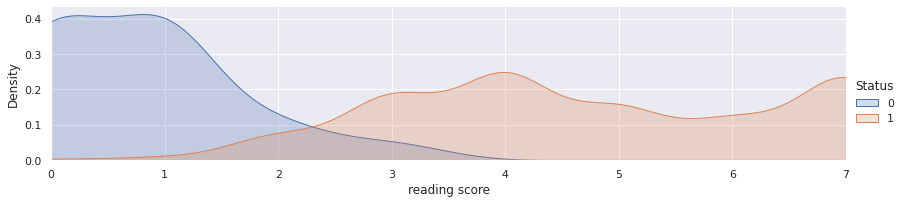

In [ ]:
facet = sns.FacetGrid(sp, hue='Status', aspect=4)
facet.map(sns.kdeplot,'reading score',shade=True)
facet.set(xlim=(0, sp['reading score'].max()))
facet.add_legend()
plt.show()

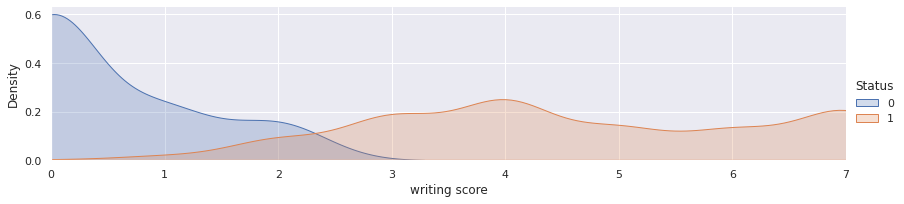

In [ ]:
facet = sns.FacetGrid(sp, hue='Status', aspect=4)
facet.map(sns.kdeplot,'writing score',shade=True)
facet.set(xlim=(0, sp['writing score'].max()))
facet.add_legend()
plt.show()

In [ ]:
for dataset in sp_test_data:
  dataset.loc[ dataset['math score'] <= 33, 'math score'] = 0
  dataset.loc[(dataset['math score'] > 33) & (dataset['math score'] <= 40), 'math score'] = 1
  dataset.loc[(dataset['math score'] > 40) & (dataset['math score'] <= 50), 'math score'] = 2
  dataset.loc[(dataset['math score'] > 50) & (dataset['math score'] <= 60), 'math score'] = 3
  dataset.loc[(dataset['math score'] > 60) & (dataset['math score'] <= 70), 'math score'] = 4
  dataset.loc[(dataset['math score'] > 70) & (dataset['math score'] <= 75), 'math score'] = 5
  dataset.loc[(dataset['math score'] > 75) & (dataset['math score'] <= 80), 'math score'] = 6
  dataset.loc[ dataset['math score'] > 80, 'math score'] = 7

In [ ]:
sp.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Grade,Status
0,0,2,5,1,0,5,5,5,4,1
1,0,3,3,1,1,4,7,7,5,1
2,0,2,6,1,0,7,7,7,6,1
3,1,1,4,0,0,2,3,2,2,1
4,1,3,3,1,0,6,6,5,5,1


In [ ]:
train_data = sp.drop('math score', axis=1)
target = sp['math score']

train_data.shape, target.shape

((1000, 9), (1000,))

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train_data, target, test_size=.20, random_state=50)
print("X_train: ", x_train.shape)
print("X_test: ", x_test.shape)
print("Y_train: ", y_train.shape)
print("Y_test: ", y_test.shape)
print(y_test)

y_test.value_counts()

X_train:  (800, 9)
X_test:  (200, 9)
Y_train:  (800,)
Y_test:  (200,)
316    6
459    5
854    4
11     1
978    3
      ..
37     2
981    7
38     5
333    7
157    3
Name: math score, Length: 200, dtype: int64


4    47
3    38
5    34
7    29
6    22
2    19
1     7
0     4
Name: math score, dtype: int64

### **Applying Decision Tree algorithm to predict math score**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 4  0  0  0  0  0  0  0]
 [ 0  3  4  0  0  0  0  0]
 [ 0  3 13  3  0  0  0  0]
 [ 0  0  4 31  3  0  0  0]
 [ 0  0  0  2 36  1  8  0]
 [ 0  0  0  0 14 16  4  0]
 [ 0  0  0  0  9  1  8  4]
 [ 0  0  0  0  0  0  3 26]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       0.50      0.43      0.46         7
           2       0.62      0.68      0.65        19
           3       0.86      0.82      0.84        38
           4       0.58      0.77      0.66        47
           5       0.89      0.47      0.62        34
           6       0.35      0.36      0.36        22
           7       0.87      0.90      0.88        29

    accuracy                           0.69       200
   macro avg       0.71      0.68      0.68       200
weighted avg       0.71      0.69      0.68       200



In [ ]:
from sklearn.metrics import accuracy_score
print("Decision Tree Accuracy:",accuracy_score(y_test, y_pred))

Decision Tree Accuracy: 0.685


### **Applying Linear Regression algorithm to predict math score**

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test,y_pred))

Logistic Regression Accuracy: 0.665


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


### **Applying Random Forest algorithm to predict the math score**

In [ ]:
from sklearn import model_selection
x_train,x_test,y_train,y_test=train_test_split(train_data,target,test_size=0.3)
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=100)
model.fit(x_train,y_train)
preds=model.predict(x_test)
from sklearn import metrics
from sklearn.metrics import r2_score

print("Random Forest accuracy: ", r2_score(y_test,preds))

Random Forest accuracy:  0.9441143022782374


### **Applying Support Vector Machine (SVM) to predict Math score**

In [ ]:
from sklearn.svm import SVC
model = SVC(gamma = 'auto')
model.fit(x_train, y_train)
print("SVM accuracy:",model.score(x_test, y_test))

SVM accuracy: 0.755


### **Applying Gaussian Naive Bayes to predict Math score**

In [ ]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB.fit(x_train, y_train)
print("Naive Bayes accuracy:",GNB.score(x_test, y_test))

Naive Bayes accuracy: 0.735
